<a href="https://colab.research.google.com/github/KeiandraK/DS-Unit-1-Sprint-2-Statistics/blob/master/Keiandra_King_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import scipy as scipy

In [0]:
# These variables are the building blocks to creating the function below
a=0.1 #true positive rate
b=0.08  # False positve
c=.95 # common 

# Probability equation= ab/ [ab+c(1-a)]
Testing_probability = (a*b)/ (a*b+c*(1-a))

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  Testing_probability = (prob_drunk_prior*false_positive_rate)/ (prob_drunk_prior*false_positive_rate+c*(1-prob_drunk_prior))  
  return prob_drunk_given_positive(Testing_probability)

In [44]:
# The test needed to be ran at least 10 times to even come close to 95% with the given variables
Testing_probability*10

0.09269988412514485

In [29]:
# This cell has the testing data with the Bayesian approach
scipy.stats.bayes_mvs(observed, alpha=0.95)

(Mean(statistic=62.25, minmax=(-23.561789278135123, 148.0617892781351)),
 Variance(statistic=8724.75, minmax=(933.2876894407725, 40430.679919940885)),
 Std_dev(statistic=74.5275006891017, minmax=(30.549757600360305, 201.0738170919846)))

In [37]:
# Test data from 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
party_stats = np.random.binomial(n=1, p=.80, size=500)
confidence_interval(party_stats, confidence=0.85)

(0.826, 0.8015316581655855, 0.8504683418344144)

In [41]:
# Frequentist approach
def confidence_interval(data, confidence=0.85):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  margin = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin, mean + margin)

frequentist_confidence_interval=confidence_interval(party_stats)
frequentist_confidence_interval

(0.826, 0.8015316581655855, 0.8504683418344144)

In [42]:
# This is the Bayesian 
scipy.stats.bayes_mvs(party_stats,alpha=.85)

(Mean(statistic=0.826, minmax=(0.8015316581655855, 0.8504683418344144)),
 Variance(statistic=0.14459154929577464, minmax=(0.13181667993567123, 0.1581946218949832)),
 Std_dev(statistic=0.38006072962776627, minmax=(0.3630656689025709, 0.39773687520141154)))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


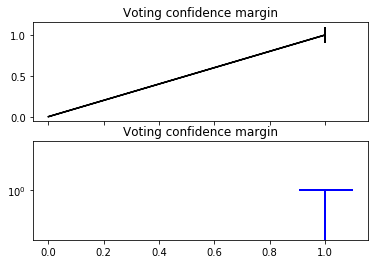

In [93]:
# The goal of this was to show the confidence of the sway of votes
# I do think that this plot was very unsuccessful in showing what I was aiming for
x = party_stats
y=party_stats
error = 0.0 + 0.1* x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x,y, yerr=error, fmt='-k')
ax0.set_title('Voting confidence margin')
lower_error = 0.95 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='b')
ax1.set_title('Voting confidence margin')
ax1.set_yscale('log')
plt.show()

# ***The Difference Between Bayesian and Frequentist statistics***

Bayesians uses probabilities to confront the uncertainty of hypothesis and events. For example the Bayes and the Beetle experiment performed by Prof. Leighton Vaughan Williams. This tests the unlikelyness of a rae beetle with patterns being found in a group. A Frequentist Statistician would not attach probabilities to hypotheses or to any fixed but unknown values in general.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!